W = tensor([[-10.5976]], requires_grad=True), b = tensor([[5.0948]], requires_grad=True), loss = tensor(0.0051, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)


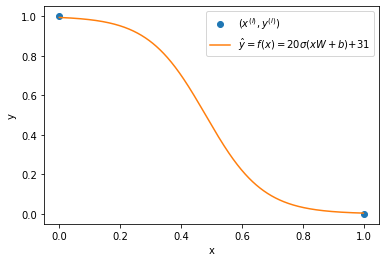

In [1]:

import torch
import matplotlib.pyplot as plt

x_train = torch.tensor([[0.0], [1.0]]).reshape(-1, 1)
y_train = torch.tensor([[1.0], [0.0]]).reshape(-1, 1)

class NOTModel:
    def __init__(self):
        # Model variables
        self.W = torch.tensor([[0.0]], requires_grad=True)  # requires_grad enables calculation of gradients
        self.b = torch.tensor([[0.0]], requires_grad=True)

    # Predictor
    def f(self, x):
        return torch.sigmoid(self.logits(x))  # @ corresponds to matrix multiplication

    def logits(self, x):
        return x @ self.W + self.b

    # Uses Mean Squared Error
    def loss(self, x, y):
        return torch.nn.functional.binary_cross_entropy_with_logits(self.logits(x), y)  # Can also use torch.nn.functional.mse_loss(self.f(x), y) to possibly increase numberical stability


model = NOTModel()

# Optimize: adjust W and b to minimize loss using stochastic gradient descent
optimizer = torch.optim.SGD([model.W, model.b], 1)
for epoch in range(1000):
    model.loss(x_train, y_train).backward()  # Compute loss gradients
    optimizer.step()  # Perform optimization by adjusting W and b

    optimizer.zero_grad()  # Clear gradients for next step

# Print model variables and loss
print("W = %s, b = %s, loss = %s" % (model.W, model.b, model.loss(x_train, y_train)))

# Visualize result
plt.plot(x_train, y_train, 'o', label='$(x^{(i)}, y^{(i)})$')
plt.xlabel('x')
plt.ylabel('y')
x = torch.arange(0.0, 1.0, 0.001).reshape(-1, 1)
y = model.f(x).detach()
plt.plot(x, model.f(x).detach(), label='$\\hat y = f(x) = 20\\sigma(xW+b$)+31')
plt.legend()
plt.show()